In [ ]:
"""
TITANIC DATASET PROJECT

Yavuz Selim Sefunc
    
Aim of the project: 
we build logistic regression, decision tree, and polynomial features to predict survival 
on the titanic. Before the model, we build Variance Threshold, SelectKBest,chi2 and 
SelectFrom which help to choose which indepedent variable best for prediction on titanic dataset.
"""

In [15]:
#importing library
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
#%%
#read train datasets
train = pd.read_csv('/Users/yavuzselimsefunc/Desktop/Final_ITU_Winter/ProjectBeyca/train.csv')

In [3]:
#check the train dataset
print('--- HEAD --- ')
print(train.head())

--- HEAD --- 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

In [4]:
# check the tail of dataset
print('--- TAIL --- ')
print(train.tail())

--- TAIL --- 
     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


In [5]:
# Display all informations
print('--- INFO ABOUT DATASET --- ')
train.info()

--- INFO ABOUT DATASET --- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# to get information three quartiles, mean, count, minimum and maximum values and the standard deviation.
print('--- DESCRIBE --- ')
train.describe()

--- DESCRIBE --- 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


'As we see above, Age  and Cabin column have lots of missing values. But, age column is important data for explorary data analysis. \nThus, we get the median of data. '

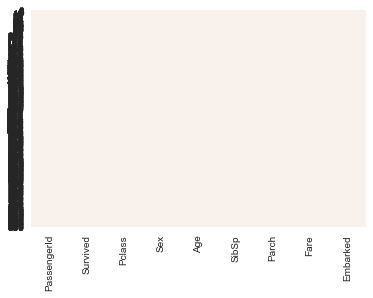

In [17]:
#now, we are checking start with a pairplot, and check for missing values
sns.heatmap(train.isnull(),cbar=False)
"""As we see above, Age  and Cabin column have lots of missing values. But, age column is important data for explorary data analysis. 
Thus, we get the median of data. """

In [18]:
#Drop unnecessary columns
drop_elements = ['Name','Cabin','Ticket']
train = train.drop(drop_elements, axis=1)

ValueError: labels ['Name' 'Cabin' 'Ticket'] not contained in axis

In [11]:
print('--- DATA CLEANING PROCESS --- ')
#Data Cleaning and Data Drop Process
train['Fare'] = train['Fare'].fillna(train['Fare'].dropna().median())
train['Age'] = train['Age'].fillna(train['Age'].dropna().median())
# Change to categoric column to numeric
train.loc[train['Sex']=='male','Sex']=0
train.loc[train['Sex']=='female','Sex']=1
# instead of nan values 
train['Embarked']=train['Embarked'].fillna('S') 
# Change to categoric column to numeric
train.loc[train['Embarked']=='S','Embarked']=0
train.loc[train['Embarked']=='C','Embarked']=1
train.loc[train['Embarked']=='Q','Embarked']=2

--- DATA CLEANING PROCESS --- 


In [ ]:
# Now, data is clean and read to a analyze
sns.heatmap(train.isnull(),cbar=False)

In [ ]:
#heatmap for train dataset
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
# how many people survived or not... %60 percent died %40 percent survived
fig = plt.figure(figsize=(18,6))
train.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.show()

In [ ]:
#Age with survived
plt.scatter(train.Survived, train.Age, alpha=0.1)
plt.title("Age with Survived")
plt.show()

In [ ]:
#Count the pessenger class
fig = plt.figure(figsize=(18,6))
train.Pclass.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.show()

In [ ]:
#Men Survived
#%20 survived
train.Survived[train.Sex=='male'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title("Men survived")
plt.show()

In [ ]:
#Women Survived
#70 percent survived
female_color='pink'
train.Survived[train.Sex=='female'].value_counts(normalize=True).plot(kind='bar', alpha=0.5,color=female_color)
plt.title("Women survived")
plt.show()

In [ ]:
#Women Men together graph
female_color='pink'
train.Sex[train.Survived==1].value_counts(normalize=True).plot(kind='bar', alpha=0.5,color=[female_color,'b'])
plt.title("Sex of survived")
plt.show()

In [ ]:
# which columns we have
print(train.columns)

In [ ]:
"""
**Variance Threshold**

This feature selection algorithm looks only at the features (X). 
We set threshold 0.5 which lower than this threshold will be removed. """

from sklearn.feature_selection import VarianceThreshold

mdlsel = VarianceThreshold(threshold=0.5)
mdlsel.fit(train)
ix = mdlsel.get_support()
#data1 = mdlsel.transform(train) 
data1 = pd.DataFrame(mdlsel.transform(train), columns = train.columns.values[ix])
"""
In terms of Variance Threshold, important features are p_id, p_class, age, sibsp, parch and fare. 
"""

In [ ]:
"""
**Select K Best**
Select features according to the k highest scores. We set k as 5 which mean getting 
important five features."""

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = train.drop("Survived",axis=1)
y = train["Survived"]

mdlsel = SelectKBest(chi2, k=5) # en iyi feature lari alma
mdlsel.fit(X,y)
ix = mdlsel.get_support() # false iyi true lari alacak..
data2 = pd.DataFrame(mdlsel.transform(X), columns = X.columns.values[ix]) # en iyi leri aldi... 7 tane...
data2.head(n=5)
"""
In terms of Variance Threshold, important features are p_class, sex,age, fare and embarked. 
"""

In [ ]:
"""
Select From Model for Logistic Regression
"""
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

X = train.drop("Survived",axis=1)
y = train["Survived"]

# Linear Model
linmdl = LogisticRegression()
linmdl.fit(X,y)
mdl = SelectFromModel(linmdl,prefit=True)
ix = mdl.get_support() # false iyi true lari alacak..
data3 = pd.DataFrame(mdl.transform(X), columns = X.columns.values[ix]) # sadece 5 tane aldi...
data3.head(n=5)
"""
For the best logistic regression, pclass and sex features are vital 
for predicting survival
"""


In [ ]:
#last feature selection
"""
**Recursive Feature Selection**

Given an external estimator that assigns weights to features 
(e.g., the coefficients of a linear model), the goal of recursive feature 
elimination (RFE) is to select features by recursively considering smaller 
and smaller sets of features. 

"""
from sklearn.feature_selection import RFE

mdl = RFE(linmdl,n_features_to_select=5)
mdl.fit(X,y)
ix = mdl.get_support() # false iyi true lari alacak..
data4 = pd.DataFrame(mdl.transform(X), columns = X.columns.values[ix]) # sadece 5 tane aldi...
data4.head(n=5)
"""
The result of recursive feature selection are p_class, sex,sibsp, parch and embarked.
"""


In [ ]:
"""
Logistic Regression
"""
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#classification - > f1
#regresyon -> mse error 


target = train['Survived'].values
# We drop embarked... because when we added it... the score is around 80%
features = train[['Pclass','Sex','SibSp','Parch','Age']].values


#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)


classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(X_train,y_train)
target_predict=classifier_.predict(X_test)

print("Logistic Regression Score: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
#18 percent fallible(yanilma payi)
print ("MSE    :",mean_squared_error(y_test,target_predict))
print ("R2     :",r2_score(y_test,target_predict))

In [ ]:
"""
Polynomial Features
"""

from sklearn import preprocessing
#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)
poly = preprocessing.PolynomialFeatures(degree=2,include_bias=False)
poly_features = poly.fit_transform(features)

classifier_ = classifier.fit(X_train,y_train)
#The score is 81%
print("Polynomial Features: ",accuracy_score(y_test,target_predict))

In [ ]:
"""
Decision Tree
"""
from sklearn import tree
from sklearn.metrics import accuracy_score

target = train['Survived'].values
data_features_names = ['Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']
features = train[data_features_names].values

#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

#features = train[['Pclass','Sex']] #78 percent verdi dustu...
#linear model olarak dusunuyor...

decision_tree = tree.DecisionTreeClassifier(random_state=1)
#output 1,0 bu nedenle decision tree classifier kullaniyoruz...

decision_tree_ = decision_tree.fit(X_train,y_train)
target_predict=decision_tree_.predict(X_test)

#The score is 77% 
print("Decision tree score: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict))
print ("R2     :",r2_score(y_test,target_predict))

In [ ]:
"""
Visualize Tree
"""
import pydotplus 
generalized_tree = tree.DecisionTreeClassifier(
        random_state = 1,
        max_depth = 7,
        min_samples_split=2
)

generalized_tree_ = generalized_tree.fit(features,target)

print("Generalized tree score: ", generalized_tree_.score(features,target))

dot_data=tree.export_graphviz(generalized_tree_,feature_names=data_features_names,out_file=None)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
graph.write_png('tree.png')